In [15]:
import warnings
warnings.filterwarnings("ignore")  # "error", "ignore", "always", "default", "module" or "once"

In [16]:
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import numpy as np
from collections import Counter

In [17]:
data = pd.read_csv ('100_ORIGA_extracted_features.csv', header=None)

In [18]:
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1,1.242707,-0.091537,-0.135973,0.457416,-0.117975,-0.412538,-0.017355,0.410860,0.122281,...,-0.014922,0.057165,0.142141,-0.082932,0.043361,0.157009,0.063270,-0.024310,0.090474,-0.156308
1,1,0.839991,-0.109243,0.401936,-0.323714,0.425319,-0.108328,0.213516,0.381205,0.257385,...,0.197106,-0.010028,-0.037860,0.132845,0.206359,0.126890,0.050385,0.129248,0.067057,-0.002651
2,1,1.528962,0.273833,-0.011418,0.409194,-0.122580,-0.377836,-0.158371,0.679542,-0.077821,...,-0.013732,0.010410,-0.134388,0.049859,-0.032728,0.102903,0.050964,-0.119752,0.076100,0.235380
3,1,-1.111428,-1.082960,1.073659,0.587702,0.557961,-0.450176,0.129196,0.005212,-0.307742,...,0.126375,0.063519,0.198422,-0.061317,-0.035745,0.162146,-0.033533,0.176736,0.067794,-0.003166
4,1,-1.173806,-0.404780,-0.082225,0.057762,0.452729,-0.243480,0.184078,0.005480,-0.777580,...,0.207707,0.115788,0.003663,-0.170156,0.024050,0.050935,-0.158112,-0.173541,0.052500,-0.049609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0,-0.171096,-1.587706,1.038420,-0.389054,0.167733,0.109614,-0.138339,0.314161,-0.041897,...,0.173781,-0.061247,-0.153643,0.299497,0.221105,0.055402,-0.205724,-0.084363,0.316498,-0.145296
646,0,1.833023,0.126241,-0.238809,-0.556297,0.077009,0.234345,0.031043,-0.538943,-0.221435,...,0.006718,-0.269619,0.131259,-0.084070,0.189569,0.047710,-0.119707,-0.053693,-0.087096,0.016063
647,0,-0.795101,-1.369659,0.908195,-0.148475,-0.430912,-0.159124,0.406196,-0.070440,-0.035525,...,0.206697,-0.102016,0.237298,0.181052,-0.247880,-0.183923,-0.124082,-0.230477,0.010742,0.157427
648,0,-0.666557,1.053101,-0.377859,0.110730,0.518402,0.164487,-0.737408,0.254882,-0.341265,...,0.080161,0.127795,-0.036047,0.106943,-0.078936,-0.092829,0.122527,0.149641,-0.119513,-0.047496


In [19]:
df = np.array(data.iloc[:,range(1,data.shape[1])])
y = data.iloc[:,0]

In [20]:
#===============================================================================
# Synthetic minority over-sampleing technique for balancing the Refuge dataset
#===============================================================================
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(df, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 482, 1: 168})
Resampple dataset shape: Counter({1: 482, 0: 482})


In [21]:
# from mlxtend.classifier import EnsembleVoteClassifier
# import csv

# clf1 = MLPClassifier(max_iter=300)
# clf2 = svm.SVC()
# clf3 =  RandomForestClassifier( n_estimators=100 , random_state = 7 )

# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

# labels = ['MLP', 'SVM' ,'Random Forest', 'Majority-Voting-Ensemble']
# for clf, label in zip([clf1, clf2, clf3, eclf], labels):
    
    
#     scores = model_selection.cross_validate(clf, X, Y, 
#                                               cv=7, 
#                                               scoring=['accuracy', 'f1'])

# #     scores = model_selection.cross_val_score(clf, X, Y, 
# #                                               cv=5, 
# #                                               scoring=['accuracy', 'f1'])
#     print("Average Accuracy: %0.2f (+/- %0.2f) [%s]" 
#           % (scores['test_accuracy'].mean(), scores['test_accuracy'].std(), label))
#     print("Average F1-score: %0.2f (+/- %0.2f) [%s]" 
#           % (scores['test_f1'].mean(), scores['test_f1'].std(), label))
    
#     my_dict = scores
#     filename = str(clf) + '_fundus_test_results_7_fold.csv'
#     with open(filename, 'w') as f:
#         for key in my_dict.keys():
#             f.write("%s,%s\n"%(key,my_dict[key]))

In [22]:
####################################################################################
# #------------------------------BASE MODEL LEARNING (K-FOLD)------------------------#
# ####################################################################################

# from sklearn.metrics import precision_recall_fscore_support as score
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix
# from mlxtend.classifier import EnsembleVoteClassifier
# import csv
# from sklearn.metrics import accuracy_score


# clf1 = MLPClassifier(max_iter=300)
# clf2 = svm.SVC()
# clf3 =  RandomForestClassifier( n_estimators=100 , random_state = 7 )

# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

# clfs=[clf1,clf2,clf3,eclf]

# labels = ['MLP', 'SVM' ,'Random Forest', 'Majority-Voting-Ensemble']

# # fix random seed for reproducibility
# seed = 100000
# np.random.seed(seed)

# folds=7 #How Many Folds

# cv_train_set=[]
# cv_test_set=[]
# kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)

# for train_index,test_index in kfold.split(df,y):
#     cv_train_set.append(train_index)
#     cv_test_set.append(test_index)
    
    
# base_models_cvscores = [] #Storing Matrix

# for clf, label in zip(clfs, labels):
#     print('============================================================================================')
#     print(label)
#     for indx in range(0,folds):
#         # Fit the model
#         history=clf.fit(df[cv_train_set[indx]], y[cv_train_set[indx]])
        
#         # evaluate the model
#         y_prdt=clf.predict(df[cv_test_set[indx]])
#         y_test=y[cv_test_set[indx]]
#         precision, recall, fscore, support = score(y_test, y_prdt)
#         acc=accuracy_score(y_test, y_prdt)
#         cm = confusion_matrix(y_test, y_prdt)
#         print('----------------------------------------------------------')
#         print('Fold:',indx)
#         print("Test Result for: , [%s]" 
#               %(label))
#         print('precision: {0:.4f}'.format(np.mean(precision)*100))
#         print('recall: {0:.4f}'.format(np.mean(recall)*100))
#         print('fscore: {0:.4f}'.format(np.mean(fscore)*100))
#         print('Accuracy: {0:.4f}'.format(acc*100))
#         print('Confusion Matrix:')
#         print(cm)
#         print('----------------------------------------------------------')
#         base_models_cvscores.append(['Fold'+str(indx),label,np.mean(precision)*100,
#                                      np.mean(recall)*100, np.mean(fscore)*100,acc*100])
# print('=======================================XXX===================================================')

MLP
----------------------------------------------------------
Fold: 0
Test Result for: , [MLP]
precision: 90.1587
recall: 89.8551
fscore: 89.8359
Accuracy: 89.8551
Confusion Matrix:
0.855072463768116
0.057971014492753624
0.9365079365079365
0.8666666666666667
14.749999999999991
0.15384615384615383
[[59 10]
 [ 4 65]]
0.8985507246376813
----------------------------------------------------------
----------------------------------------------------------
Fold: 1
Test Result for: , [MLP]
precision: 84.4617
recall: 82.6087
fscore: 82.3717
Accuracy: 82.6087
Confusion Matrix:
0.7101449275362319
0.057971014492753624
0.9245283018867925
0.7647058823529411
12.249999999999993
0.30769230769230765
[[49 20]
 [ 4 65]]
0.8260869565217391
----------------------------------------------------------
----------------------------------------------------------
Fold: 2
Test Result for: , [MLP]
precision: 85.6270
recall: 85.5072
fscore: 85.4951
Accuracy: 85.5072
Confusion Matrix:
0.8260869565217391
0.11594202898

----------------------------------------------------------
Fold: 0
Test Result for: , [Majority-Voting-Ensemble]
precision: 88.4381
recall: 88.4058
fscore: 88.4034
Accuracy: 88.4058
Confusion Matrix:
0.8985507246376812
0.13043478260869565
0.8732394366197183
0.8955223880597015
6.8888888888888875
0.11666666666666668
[[62  7]
 [ 9 60]]
0.8840579710144927
----------------------------------------------------------
----------------------------------------------------------
Fold: 1
Test Result for: , [Majority-Voting-Ensemble]
precision: 88.9291
recall: 88.4058
fscore: 88.3667
Accuracy: 88.4058
Confusion Matrix:
0.8260869565217391
0.057971014492753624
0.9344262295081968
0.8441558441558441
14.249999999999991
0.18461538461538463
[[57 12]
 [ 4 65]]
0.8840579710144927
----------------------------------------------------------
----------------------------------------------------------
Fold: 2
Test Result for: , [Majority-Voting-Ensemble]
precision: 88.5353
recall: 88.4058
fscore: 88.3960
Accuracy:

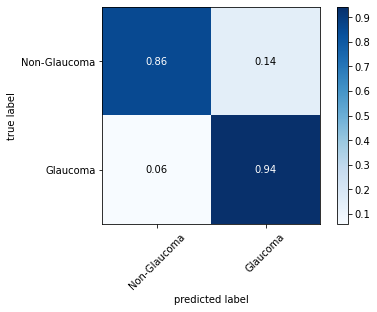

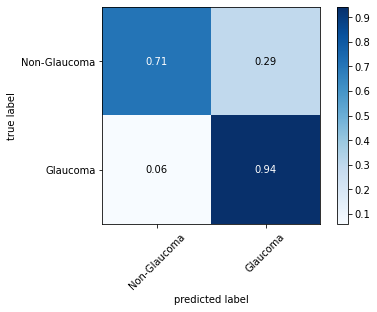

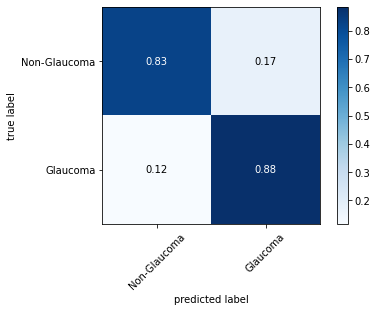

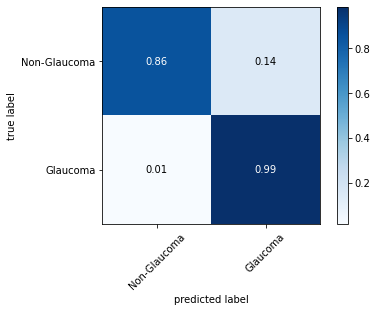

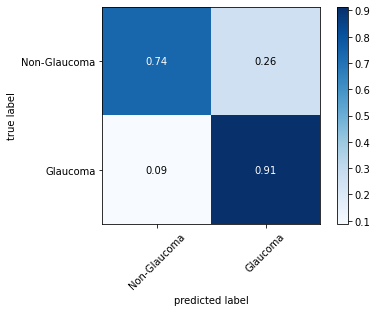

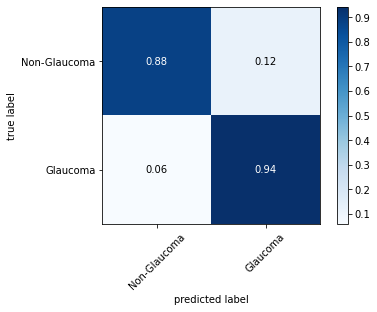

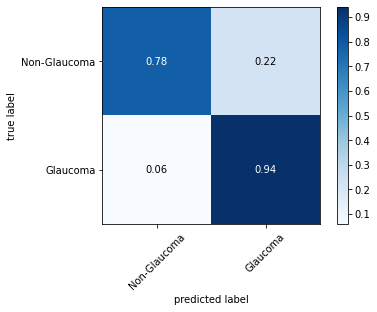

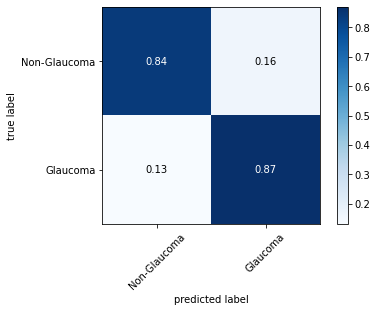

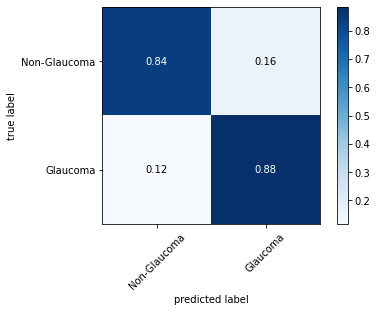

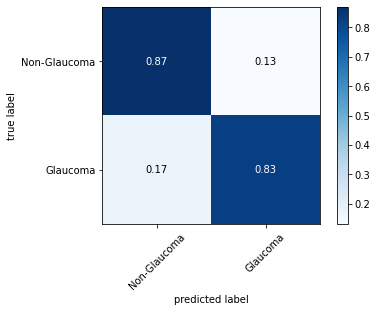

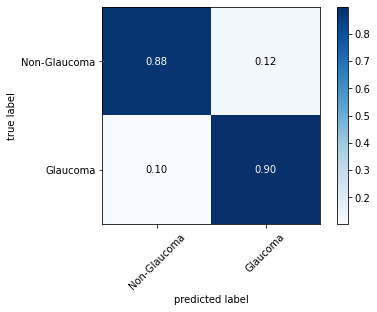

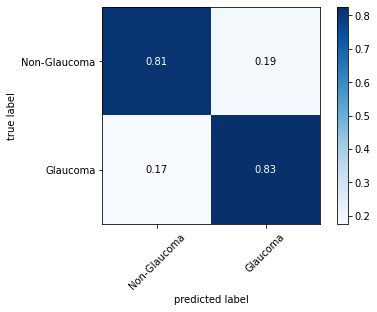

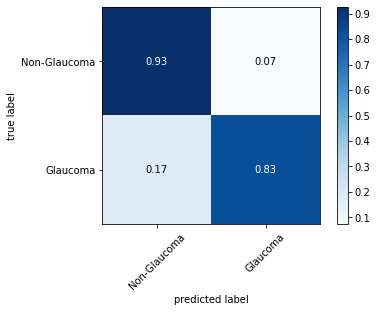

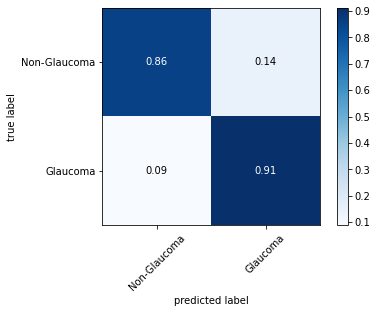

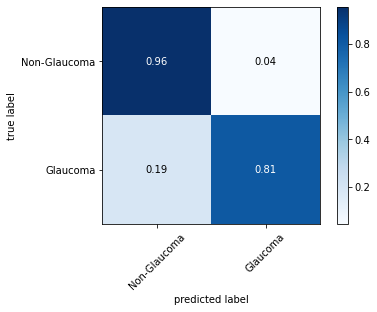

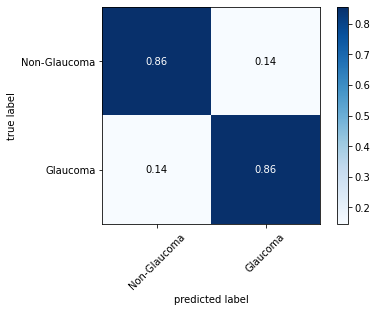

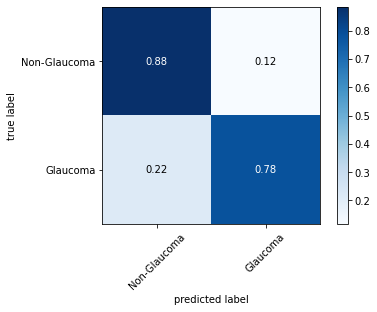

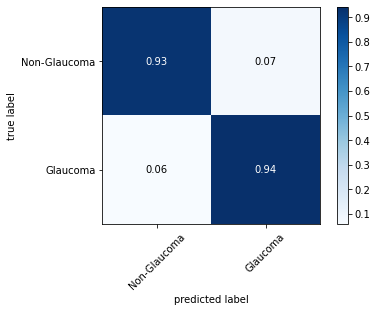

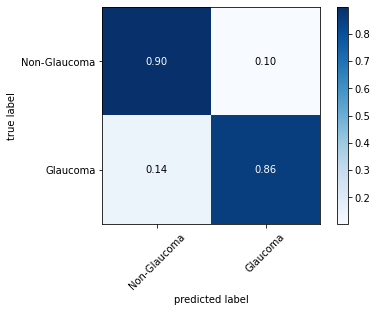

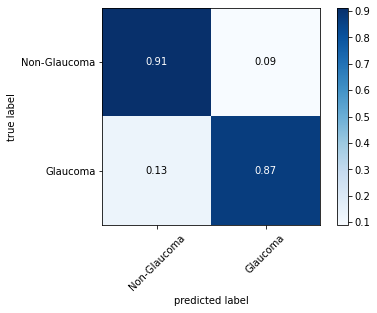

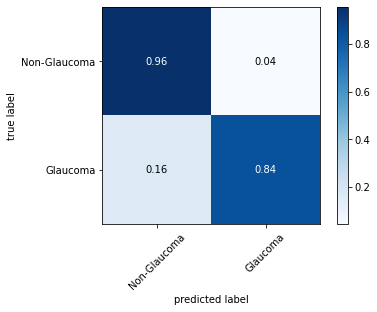

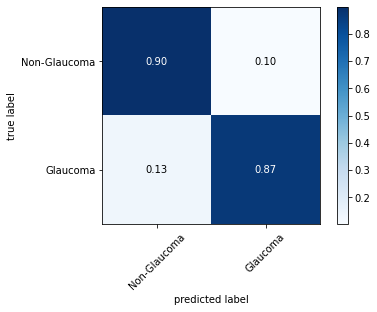

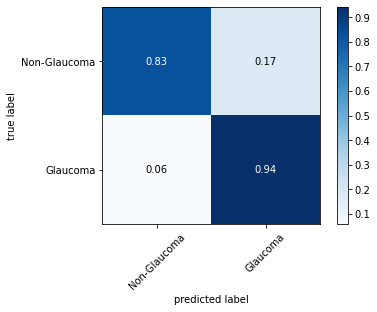

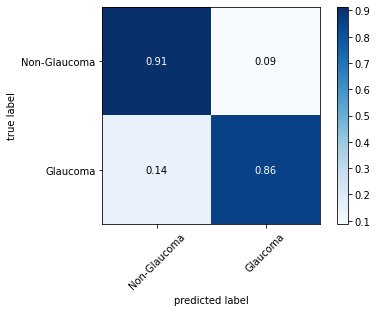

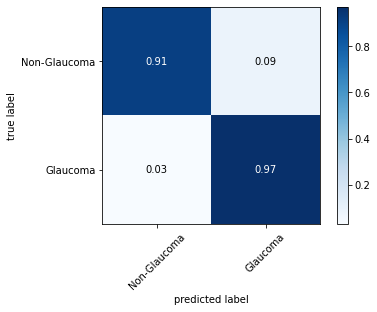

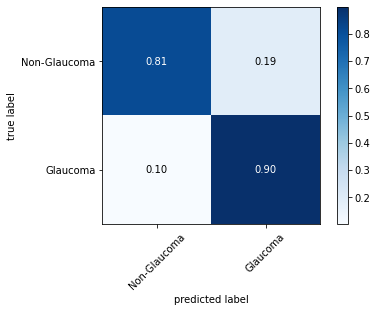

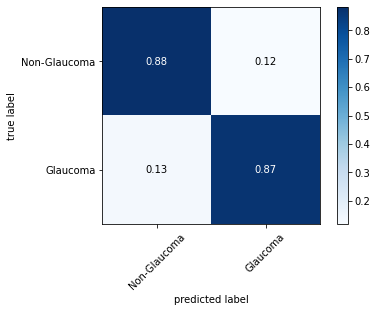

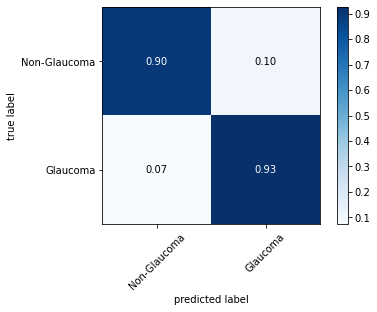

In [24]:
####################################################################################
#------------------------------BASE MODEL LEARNING (K-FOLD)------------------------#
####################################################################################

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from mlxtend.classifier import EnsembleVoteClassifier
import csv
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
# from matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score




clf1 = MLPClassifier(max_iter=300)
clf2 = svm.SVC()
clf3 =  RandomForestClassifier( n_estimators=100 , random_state = 7 )

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

clfs=[clf1,clf2,clf3,eclf]

labels = ['MLP', 'SVM' ,'Random Forest', 'Majority-Voting-Ensemble']

# fix random seed for reproducibility
seed = 100000
np.random.seed(seed)

folds=7 #How Many Folds

cv_train_set=[]
cv_test_set=[]
kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)

for train_index,test_index in kfold.split(x_smote,y_smote):
    cv_train_set.append(train_index)
    cv_test_set.append(test_index)
    
    
base_models_cvscores = [] #Storing Matrix
for clf, label in zip(clfs, labels):
    print('============================================================================================')
    print(label)
    for indx in range(0,folds):
        # Fit the model
        history=clf.fit(x_smote[cv_train_set[indx]], y_smote[cv_train_set[indx]])
        
        # evaluate the model
        y_prdt=clf.predict(x_smote[cv_test_set[indx]])
        y_test=y_smote[cv_test_set[indx]]
        precision, recall, fscore, support = score(y_test, y_prdt, average='weighted', 
                                                   labels=np.unique(y_prdt))
        acc=accuracy_score(y_test, y_prdt)
        cm = confusion_matrix(y_test, y_prdt)
        TP = cm[0][0]
        FN = cm[0][1]
        FP = cm[1][0]
        TN = cm[1][1]
        TPR = TP/(TP+FN)
        FPR = FP/(FP+TN)
        PPV = TP/(TP+FP)
        NPV = TN/(TN+FN)
        TNR = TN/(TN+FP)
        TPR = TP/(TP+FN)
        LRPOS = TPR/ (1-TNR)
        LRNEG = (1-TPR)/TNR
        roc_score = roc_auc_score(y_test, y_prdt)
        print('----------------------------------------------------------')
        print('Fold:',indx)
        print("Test Result for: , [%s]" 
              %(label))
        print('precision: {0:.4f}'.format(np.mean(precision)*100))
        print('recall: {0:.4f}'.format(np.mean(recall)*100))
        print('fscore: {0:.4f}'.format(np.mean(fscore)*100))
        print('Accuracy: {0:.4f}'.format(acc*100))
        print('Confusion Matrix:')
        print(TPR)
        print(FPR)
        print(PPV)
        print(NPV)
        print(LRPOS)
        print(LRNEG)
        print(cm)
        print(roc_score)
        
        

        class_names = ['Non-Glaucoma','Glaucoma']

        fig, ax = plot_confusion_matrix(conf_mat=cm,
                                        colorbar=True,
                                        show_absolute=False,
                                        show_normed=True,
                                        class_names=class_names)

        plt.savefig('final_plots/Fold_'+str(indx)+'_'+label+'.png', bbox_inches = 'tight')


        ## Display the visualization of the Confusion Matrix.
#         plt.show()
        print('----------------------------------------------------------')
        base_models_cvscores.append([str(indx),label,np.mean(precision)*100,
                                     np.mean(recall)*100, np.mean(fscore)*100,acc*100,TPR,FPR,LRPOS,LRNEG,roc_score])
print('=======================================XXX===================================================')
result_lables = ['Fold', 'Model', 'Precision', 'Recall','F1', 'Acc', 'TPR', 'FPR', 'LRPOS', 'LRNEG', 'ROC']

base_models_cvscores = pd.DataFrame(base_models_cvscores)
base_models_cvscores.to_csv('final_result/Final_result_2022.csv', header = result_lables)

In [25]:
#================================================
#Final Result analysis
#================================================
result_final = pd.read_csv('final_result/Final_result_2022.csv')
result_final

labels = ['MLP', 'SVM' ,'Random Forest', 'Majority-Voting-Ensemble']

final_result_avg_for_paper= list()
final_result_std_for_paper= list()

for i  in labels:
    indx = np.where(result_final['Model'] == i)
    val_avg = np.mean(result_final.iloc[indx[0],range(3,12)], axis= 0)
    val_std = np.std(result_final.iloc[indx[0],range(3,12)], axis= 0)
    final_result_avg_for_paper.append([i, val_avg[0],val_avg[1],val_avg[2],val_avg[3], val_avg[4], val_avg[5],val_avg[6],val_avg[7], val_avg[8]])
    final_result_std_for_paper.append([i, val_std[0],val_std[1],val_std[2],val_std[3], val_std[4], val_std[5],val_std[6],val_std[7], val_std[8]])
    

final_result_avg_for_paper  = pd.DataFrame(final_result_avg_for_paper)
final_result_std_for_paper  = pd.DataFrame(final_result_std_for_paper)

In [26]:
final_result_avg_for_paper.to_csv('final_result/Final_result_avg_paper_2022.csv',header= ['Model','Precision','Recall','F1','Acc','TPR','FPR','LRPOS','LRNEG','ROC'])
final_result_std_for_paper .to_csv('final_result/Final_result_std_paper_2022.csv',header= ['Model','Precision','Recall','F1','Acc','TPR','FPR','LRPOS','LRNEG','ROC'])

In [27]:
final_result_avg_for_paper

,0,1,2,3,4,5,6,7,8,9
0,MLP,87.872871,87.140137,87.064996,87.140137,0.807210,0.064304,18.592848,0.206700,0.871453
1,SVM,86.309911,86.206949,86.199297,86.206949,0.861131,0.136829,6.727632,0.160946,0.862151
2,Random Forest,88.444252,88.176845,88.154954,88.176845,0.912861,0.149403,7.163833,0.102874,0.881729
3,Majority-Voting-Ensemble,89.272959,89.108522,89.096445,89.108522,0.877603,0.095390,12.274841,0.135286,0.891106
